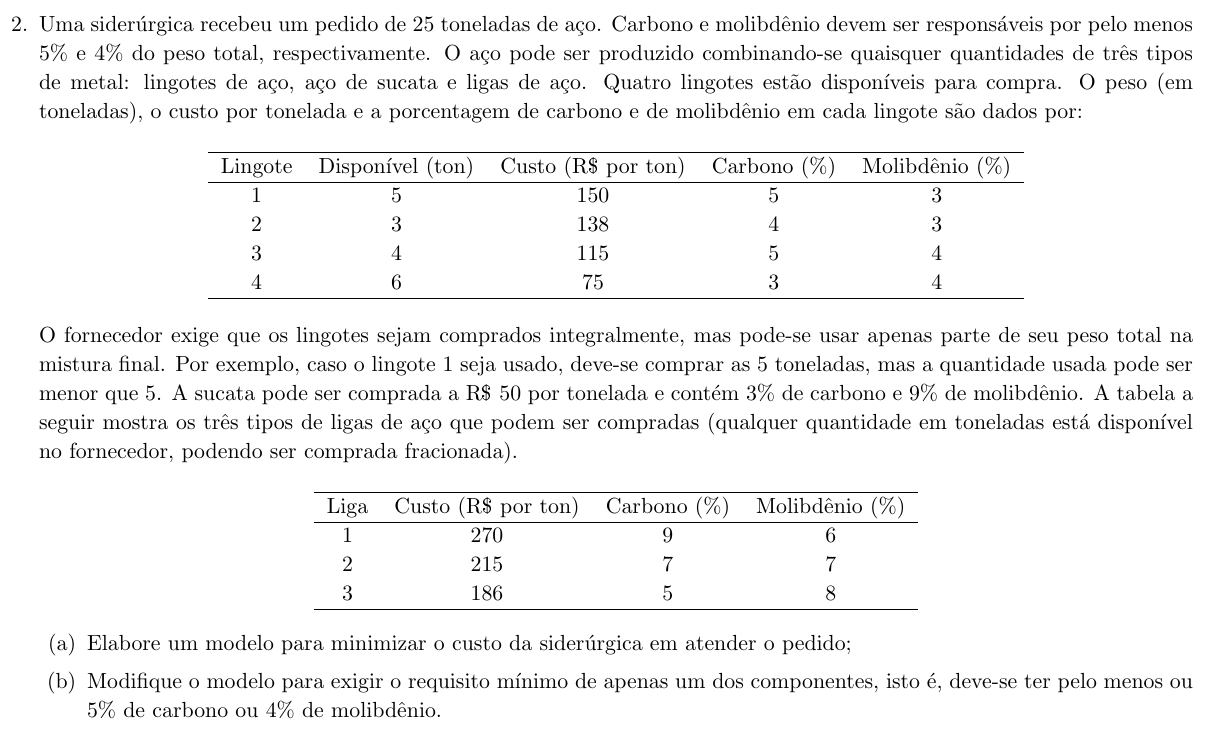

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='images/2.png')

In [14]:
# Conjuntos
materia_prima = ['Lingote 1', 'Lingote 2', 'Lingote 3', 'Lingote 4', 'Aço de sucata',
                 'Liga 1', 'Liga 2', 'Liga 3']
disponibilidade = {'Lingote 1': 5, 'Lingote 2': 3, 'Lingote 3': 4, 'Lingote 4': 6,
                   'Aço de sucata': 100, 'Liga 1': 100, 'Liga 2': 100, 'Liga 3': 100}
custo = {'Lingote 1': 150, 'Lingote 2': 138, 'Lingote 3': 115, 'Lingote 4': 75,
         'Aço de sucata': 50, 'Liga 1': 270, 'Liga 2': 215, 'Liga 3': 186}
a_carbono = {'Lingote 1': 0.05, 'Lingote 2': 0.04, 'Lingote 3': 0.05, 'Lingote 4': 0.03,
             'Aço de sucata': 0.03, 'Liga 1': 0.09, 'Liga 2': 0.07, 'Liga 3': 0.05}
b_molibdenio = {'Lingote 1': 0.03, 'Lingote 2': 0.03, 'Lingote 3': 0.04, 'Lingote 4': 0.04,
                'Aço de sucata': 0.09, 'Liga 1': 0.06, 'Liga 2': 0.07, 'Liga 3': 0.08}
demanda = 25
l_carbono = 0.05
l_molibdenio = 0.04

In [15]:
# Módulos
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [16]:
# Modelo
model = ConcreteModel()

# Conjuntos
model.M = Set(initialize = materia_prima)
M = model.M

# Parâmetros
model.d = Param(model.M, initialize = disponibilidade, within = NonNegativeReals)
d = model.d
model.c = Param(model.M, initialize = custo, within = NonNegativeReals)
c = model.c
model.a = Param(model.M, initialize = a_carbono, within = NonNegativeReals)
a = model.a
model.b = Param(model.M, initialize = b_molibdenio, within = NonNegativeReals)
b = model.b

# Variáveis de decisão
model.x = Var(model.M, within = NonNegativeIntegers)
x = model.x
model.y = Var(model.M, within = NonNegativeIntegers)
y = model.y
model.z = Var(model.M, within = Binary)
z = model.z
model.w = Var(within = Binary)
w = model.w

# Objetivo
model.obj = Objective(sense = minimize,
                     expr = sum(c[i] * y[i] for i in M))

# Restrições
    # Demanda
model.r_demanda = Constraint(rule = sum(x[i] for i in M) == demanda)
    # Composição
model.r_carbo = Constraint(rule = l_carbono * demanda - 10 * (1 - w) <= sum(a[i] * x[i] for i in M))
model.r_molib = Constraint(rule = l_molibdenio * demanda - 10 * w <= sum(b[i] * x[i] for i in M))
    # Disponibilidade
model.r_dispo = ConstraintList()
for i in ['Lingote 1', 'Lingote 2', 'Lingote 3', 'Lingote 4']:
    model.r_dispo.add(expr = y[i] == d[i] * z[i])
for i in M:
    model.r_dispo.add(expr = x[i] <= y[i])

# model.pprint()

In [17]:
# Resolução
solver = SolverFactory('glpk')
resultado = solver.solve(model, tee = False)

In [18]:
# Apresentação de resultados
if (resultado.solver.status == SolverStatus.ok) and (resultado.solver.termination_condition != TerminationCondition.infeasible):
    for i in M:
        print('Qtd. de {} utilizado(a): {:.0f} ton'.format(i, value(x[i])))
        print('{} comprado(a): {:.0f} ton'.format(i, value(y[i])))
    print()
    print('O custo mínimo obtido é R${:.2f}.'.format(model.obj.expr()))
else:
    print(resultado.solver.termination_condition)

Qtd. de Lingote 1 utilizado(a): 0 ton
Lingote 1 comprado(a): 0 ton
Qtd. de Lingote 2 utilizado(a): 0 ton
Lingote 2 comprado(a): 0 ton
Qtd. de Lingote 3 utilizado(a): 0 ton
Lingote 3 comprado(a): 0 ton
Qtd. de Lingote 4 utilizado(a): 0 ton
Lingote 4 comprado(a): 0 ton
Qtd. de Aço de sucata utilizado(a): 25 ton
Aço de sucata comprado(a): 25 ton
Qtd. de Liga 1 utilizado(a): 0 ton
Liga 1 comprado(a): 0 ton
Qtd. de Liga 2 utilizado(a): 0 ton
Liga 2 comprado(a): 0 ton
Qtd. de Liga 3 utilizado(a): 0 ton
Liga 3 comprado(a): 0 ton

O custo mínimo obtido é R$1250.00.
